Refer folder structure containing image data for two classes, **Cars** and **Bikes**, and must first verify and refer to this structure before implementation. All RGB images from both folders should be loaded, resized to a fixed size, normalized, and converted into one-dimensional feature vectors. Class labels must be assigned, after which the combined dataset should be shuffled and split into training and testing sets in an 80:20 ratio. A logistic regression model is to be implemented from scratch by initializing weights and bias, defining the sigmoid function, performing forward and backward propagation, and updating parameters using gradient descent. The model should be trained for a fixed number of iterations while recording the cost values. Finally, predictions must be generated for both training and testing datasets to compute accuracy, and a cost versus iterations graph should be plotted along with reporting the final training and testing accuracy.


In [5]:
import os
import numpy as np
from PIL import Image

def load_images_from_folder(folder, label, size=(64,64)):
    data, labels = [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)

        # Skip directories and only allow image files
        if not os.path.isfile(img_path):
            continue
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            continue

        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)
            img_array = np.array(img) / 255.0   # normalize
            data.append(img_array.flatten())    # flatten to 1D
            labels.append(label)
        except Exception as e:
            print(f"Skipping {img_path}: {e}")
            continue

    return np.array(data), np.array(labels)
    
cars_data, cars_labels = load_images_from_folder("transport/cars", 0)
bikes_data, bikes_labels = load_images_from_folder("transport/bike", 1)

X = np.vstack((cars_data, bikes_data))
y = np.hstack((cars_labels, bikes_labels))

In [6]:
cars_data, cars_labels = load_images_from_folder("transport/cars", 0)
bikes_data, bikes_labels = load_images_from_folder("transport/bike", 1)

print("Cars loaded:", cars_data.shape[0])
print("Bikes loaded:", bikes_data.shape[0])

Cars loaded: 420
Bikes loaded: 365


In [7]:
print("X shape:", X.shape)   
print("y shape:", y.shape)   

X shape: (785, 12288)
y shape: (785,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (628, 12288) (628,)
Test set: (157, 12288) (157,)


In [9]:
def initialize_weights(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def forward_propagation(X, W, b):
    z = np.dot(X, W) + b
    A = sigmoid(z)
    return A

#forward propagation

In [12]:
def compute_cost(A, y):
    m = y.shape[0]
    cost = -(1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
    return cost

#cost function

In [13]:
def backward_propagation(X, A, y):
    m = X.shape[0]
    dz = A - y.reshape(-1,1)
    dW = (1/m) * np.dot(X.T, dz)
    db = (1/m) * np.sum(dz)
    return dW, db

#backward propagation

In [14]:
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    n_features = X.shape[1]
    W, b = initialize_weights(n_features)
    costs = []

    for i in range(iterations):
        A = forward_propagation(X, W, b)
        cost = compute_cost(A, y)
        dW, db = backward_propagation(X, A, y)

        W -= learning_rate * dW
        b -= learning_rate * db

        costs.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return W, b, costs

In [18]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42
)
y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

Class distribution: {np.int64(0): np.int64(420), np.int64(1): np.int64(365)}


In [31]:
# Standardize features (fit on train, apply to both)
mu = X_train.mean(axis=0, keepdims=True)
sigma = X_train.std(axis=0, keepdims=True) + 1e-8
X_train_std = (X_train - mu) / sigma
X_test_std  = (X_test  - mu) / sigma

def initialize_weights(n_features):
    W = np.zeros((n_features, 1))
    b = 0.0
    return W, b

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def forward(X, W, b):
    return sigmoid(X @ W + b)

def compute_cost(A, y, W, l2=0.0):
    m = y.shape[0]
    A = np.clip(A, 1e-7, 1 - 1e-7)
    # Binary cross-entropy + L2
    cost = -(1/m) * (y.T @ np.log(A) + (1 - y).T @ np.log(1 - A))
    reg  = (l2/(2*m)) * np.sum(W**2)
    return float(cost + reg)

def backward(X, A, y, W, l2=0.0):
    m = X.shape[0]
    dz = A - y
    dW = (1/m) * (X.T @ dz) + (l2/m) * W
    db = (1/m) * np.sum(dz)
    return dW, db

def gradient_descent(X, y, lr=0.0005, iters=1000, l2=0.0):
    n = X.shape[1]
    W, b = initialize_weights(n)
    costs, accs = [], []

    for i in range(iters):
        A = forward(X, W, b)
        cost = compute_cost(A, y, W, l2=l2)
        dW, db = backward(X, A, y, W, l2=l2)

        W -= lr * dW
        b -= lr * db

        if i % 100 == 0:
            preds = (A > 0.5).astype(int)
            acc = (preds == y).mean() * 100
            print(f"Iteration {i}, Cost: {cost:.4f}, Train Acc: {acc:.2f}%")
        costs.append(cost)
        accs.append(acc if i % 100 == 0 else accs[-1] if accs else 0)

    return W, b, costs, accs

W, b, costs, accs = gradient_descent(X_train_std, y_train, lr=0.0005, iters=1000, l2=1e-4)

# Evaluate
def predict(X, W, b):
    return (forward(X, W, b) > 0.5).astype(int)

y_train_pred = predict(X_train_std, W, b)
y_test_pred  = predict(X_test_std,  W, b)

train_acc = (y_train_pred == y_train).mean() * 100
test_acc  = (y_test_pred  == y_test).mean()  * 100
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Testing Accuracy:  {test_acc:.2f}%")

C:\Users\Ankitha Hathwar\AppData\Local\Temp\ipykernel_25960\2439046321.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(cost + reg)


Iteration 0, Cost: 0.6931, Train Acc: 53.50%
Iteration 100, Cost: 0.4666, Train Acc: 78.34%
Iteration 200, Cost: 0.4243, Train Acc: 81.85%
Iteration 300, Cost: 0.3946, Train Acc: 83.76%
Iteration 400, Cost: 0.3710, Train Acc: 85.19%
Iteration 500, Cost: 0.3513, Train Acc: 86.31%
Iteration 600, Cost: 0.3344, Train Acc: 87.74%
Iteration 700, Cost: 0.3195, Train Acc: 88.85%
Iteration 800, Cost: 0.3062, Train Acc: 89.97%
Iteration 900, Cost: 0.2942, Train Acc: 90.61%
Training Accuracy: 91.24%
Testing Accuracy:  68.15%


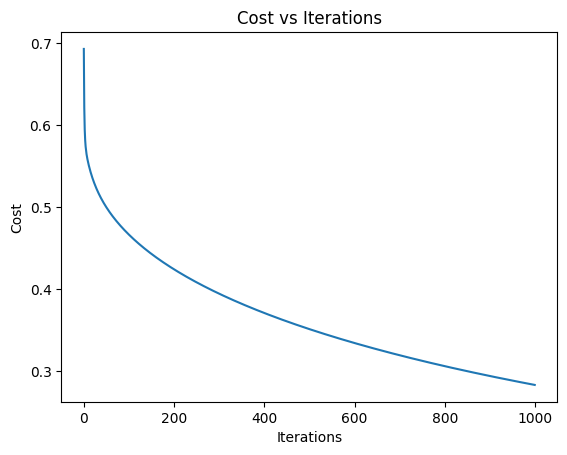

In [32]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

In [34]:
from PIL import Image
import numpy as np

# Preprocess a single image
def preprocess_single_image(img_path, size=(64,64), mu=None, sigma=None):
    img = Image.open(img_path).convert('RGB')
    img = img.resize(size)
    img_array = np.array(img) / 255.0
    flat = img_array.flatten().reshape(1, -1)
    if mu is not None and sigma is not None:
        flat = (flat - mu) / sigma
    return flat

# Predict using trained weights
def predict_single(img_path, W, b, mu, sigma):
    x_single = preprocess_single_image(img_path, mu=mu, sigma=sigma)
    A = 1 / (1 + np.exp(-(x_single @ W + b)))
    return "Car" if A[0][0] < 0.5 else "Bike"

# Example usage:
print(predict_single("images7.jpg", W, b, mu, sigma))

Car
